# Basically we are just playing around mnist data set (trying to loading the data from tensorflow and trying to see the see the shape of test train and validation data ,trying to plot the image of particular data and see what its actually showing)

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc8364952e8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc835a877f0>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7fc83a9fc780>)

In [5]:
mnist.train.images.shape

(55000, 784)

In [6]:
mnist.train.labels.shape

(55000, 10)

In [7]:
mnist.test.images.shape ,mnist.test.labels.shape

((10000, 784), (10000, 10))

In [8]:
mnist.validation.images.shape

(5000, 784)

In [9]:
import numpy as np
from matplotlib import pyplot as plt

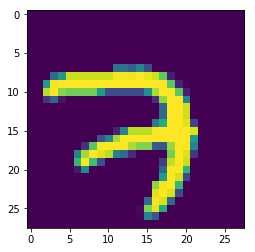

In [10]:
#very much standard code for ploting the images 

first_images=mnist.train.images[0]
first_images=np.array(first_images)
first_images=first_images.reshape((28,28))
plt.imshow(first_images)
plt.show()

In [11]:
with tf.Session() as sees:
    print(tf.random_normal([784,256]).eval())

[[ 0.31837171  0.51290506  0.34612358 ..., -0.79726416 -1.54743981
   0.31303528]
 [-0.60380638  0.19586851  0.2029831  ...,  0.8534984   0.93014073
  -0.37689558]
 [ 0.12755764 -0.28138807  0.17264956 ...,  0.39052051  0.37102893
  -1.00513613]
 ..., 
 [-0.03714145  0.87355036  0.57927346 ...,  0.37461248  0.27103809
   1.03958833]
 [-0.5154646  -0.22890115  0.15432079 ...,  2.68222666  0.01607057
   0.52192092]
 [-0.56920171 -0.39729121  0.55851907 ..., -0.5383119   0.83936197
  -0.12365187]]


In [12]:
n_input=784
n_hidden_1=256
n_hidden_2=256
n_classes=10

weights={
    'h1':tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}


biases={
    'h1':tf.Variable(tf.random_normal([n_hidden_1])),
    'h2':tf.Variable(tf.random_normal([n_hidden_2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
}


In [13]:
def forward_propogation(x,weights,biases):
    in_layer1=tf.add(tf.matmul(x,weights['h1']),biases['h1'])
    out_layer1=tf.nn.relu(in_layer1)
    
    in_layer2=tf.add(tf.matmul(out_layer1,weights['h2']),biases['h2'])
    out_layer2=tf.nn.relu(in_layer2)
    
    output=tf.add(tf.matmul(out_layer2,weights['out']),biases['out'])
    
    return output
    

In [14]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())
x=tf.placeholder("float",[None,784])
y=tf.placeholder(tf.int32,[None,10])
pred=forward_propogation(x,weights,biases)

In [15]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [16]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)

In [17]:
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [18]:
batch_size=100
for i in range(25):
    num_batches=int(mnist.train.num_examples/batch_size)
    total_cost=0
    for j in range(num_batches):
        batch_x,batch_y=mnist.train.next_batch(batch_size)
        c,_=sess.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        total_cost+=c
    print(total_cost)    

25250.6437359
4797.03777376
2721.5862397
1884.22179227
1516.41588448
1255.12181906
1093.81689465
1145.54482088
875.086271836
742.966826227
730.057175466
730.662628136
607.820367391
449.049214209
500.370803257
446.040602162
475.028826273
325.252531066
372.875947039
287.094620254
283.212052376
271.851278056
331.801390676
211.144125912
154.198929329


In [24]:
pred=forward_propogation(x,weights,biases)
predictions=tf.argmax(pred,1)
true_labels=tf.argmax(y,1)
correct_predictions=tf.equal(predictions,true_labels)

In [25]:
prediction_eval,labels,correct_pred=sess.run([predictions,true_labels,correct_predictions],feed_dict={x:mnist.test.images,y:mnist.test.labels})
prediction_eval,labels,correct_pred

(array([7, 2, 1, ..., 4, 5, 6]),
 array([7, 2, 1, ..., 4, 5, 6]),
 array([ True,  True,  True, ...,  True,  True,  True], dtype=bool))

In [26]:
correct_pred.sum()

9596